# Explore here

In [212]:
# Manejo de datos
import pandas as pd
import numpy as np
# Graficos
import matplotlib.pyplot as plt
# Funciones propias EDA
import eda_functions
# Sklearn - Escalado y preparacion de datos para el modelo
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Sklearn - Modelos
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
import xgboost as xgb
# Sklearn - Metricas
from sklearn.metrics import *

# Sklearn - Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Ignorar warning de convergencia de modelo
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)







# Análisis de datos

En esta sección, realizaremos un análisis exploratorio de los datos para comprender mejor su estructura y características.

## Carga de datos

Comenzaremos cargando los datos desde un archivo CSV y visualizando las primeras filas del dataframe.



In [213]:
# Importamos datos desde la URL y los guardamos en un archivo local
# pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv').to_csv('health_data.csv')
df = pd.read_csv('health_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13

In [214]:
# Informacion del dataset
eda_functions.df_info(df)

,nunique,nulls,percent_nulls,Dtype,non_null,total_values
Unnamed: 0,3140,0,0.0,int64,3140,3140
fips,3140,0,0.0,int64,3140,3140
TOT_POP,3074,0,0.0,int64,3140,3140
0-9,2723,0,0.0,int64,3140,3140
0-9 y/o % of total pop,3136,0,0.0,float64,3140,3140
...,...,...,...,...,...,...
CKD_prevalence,43,0,0.0,float64,3140,3140
CKD_Lower 95% CI,39,0,0.0,float64,3140,3140
CKD_Upper 95% CI,46,0,0.0,float64,3140,3140
CKD_number,1894,0,0.0,int64,3140,3140


Dtype
float64    61
int64      46
object      2
Name: count, dtype: int64

El dataframe tiene 3140 filas y 109 columnas
Hay 0 valores duplicados
 Hay 0 valores nulos en el dataframe


-----------------------------------------------------------------------------------------------------
- No hay valores nulos ni duplicados.                                          
 
 Debido a la gran cantidad de columnas el analisis exploratorio se hara numericamente y sin graficos|
-----------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------

In [215]:
df.describe()

,Unnamed: 0,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1569.500000,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04

#### El dataframe consta de una serie de columnas que aportan informacion sobre datos demograficos de las muestras y una segunda parte que contiene datos sobre enfermedades y desordenes de la salud.

-----------------------------------------------------------------------------------------------------

Definicion del objetivo del modelo|
-----------------------------------

- En base a la variable 'Heart disease_prevalence' crearemos un modelo que permita anticipar como pueden afectar a la prevalencia de afecciones cardiacas otros trastornos de salud, factores demograficos, el acceso y la calidad de la atención médica, el envejecimiento de la poblacion, etc.

- La prevalencia mide la proporción de personas que tienen una enfermedad en un momento específico en porcentaje 

In [216]:
# Eliminamos la columna 'Unnamed: 0' que no aporta informacion
df = df.drop(columns=['Unnamed: 0'])
# Asignamos la etiqueta de nuestra columa objetivo a la variable target
target = 'Heart disease_prevalence'  

- Hay variables que pueden estar relacionadas entre si y hay que definirlas y eliminarlas para evitar  'Data Leakage'.

In [217]:
# Eliminamos columnas que podrian contener informacion redundante o relacionada con la columna objetivo
related_columns = ['anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
                   'anycondition_number','Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
                   'Heart disease_number']

In [218]:
# Eliminamos columnas relacionadas
df.drop(related_columns, axis=1, inplace=True)

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

CODIFICACION DE VARIABLES CATEGORICAS|
-------------------------------------

In [219]:
# Determinamos la cantidad de valores unicos de las dos variables categoricas para determinar de que forma las vamos a codificar
df_object = df.select_dtypes(include=['object'])
df_object.nunique()

COUNTY_NAME    1841
STATE_NAME       51
dtype: int64

- Descarto Onehot Encoding porque supondria aumentar el numero de columnas en unas 1900

- Descarto label encoding porque el elevado numero de valores unicos podria afectar al peso que el modelo le diera a cada etiqueta.

- Opto por TargetEncoding basado en la media del valor objetivo para cada valor categorico


In [220]:
# Codificamos las variables categoricas con TargetEncoding
df_new = eda_functions.target_encoding(df, 'COUNTY_NAME', target, 1)
df_new = eda_functions.target_encoding(df_new, 'STATE_NAME', target, 1)

---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------

ANALISIS Y NORMALIZACION DE VARIABLES|
----------------------------------

In [221]:
# Hallamos el valor de skewness de las variables numericas
df_new.skew()

fips                      -0.079334
TOT_POP                   13.573809
0-9                       13.065868
0-9 y/o % of total pop     0.654057
19-Oct                    13.093721
                            ...    
CKD_Upper 95% CI           0.408458
CKD_number                14.026491
Urban_rural_code          -0.768025
encoded_COUNTY_NAME        0.225641
encoded_STATE_NAME         0.395530
Length: 101, dtype: float64

In [222]:
# Definimos las lista de las columnas con valores de sesgo mas altos
columns_list = []
for column in df_new.columns:
    if df_new[column].skew() > 1 or df_new[column].skew() < -1:
        columns_list.append(column)

In [223]:
# 68 columnas con valores de sesgo mayores a 1
len(columns_list)

68

In [224]:
# Aplicamos windsorizacion a las columnas con valores de sesgo mas altos
for column in columns_list:
    df_new[column] = winsorize(df_new[column], limits=[0.2, 0.2])  

In [225]:
# Comprobamos le resultado de la transformacion
df_new.skew()

fips                     -0.079334
TOT_POP                   0.711974
0-9                       0.727155
0-9 y/o % of total pop    0.654057
19-Oct                    0.717893
                            ...   
CKD_Upper 95% CI          0.408458
CKD_number                0.638118
Urban_rural_code         -0.768025
encoded_COUNTY_NAME       0.225641
encoded_STATE_NAME        0.395530
Length: 101, dtype: float64

In [226]:
# Comprobamos el estado del dataframe // sigue sin haber valores nulos ni duplicados
eda_functions.df_info(df_new)

,nunique,nulls,percent_nulls,Dtype,non_null,total_values
fips,3140,0,0.0,int64,3140,3140
TOT_POP,1849,0,0.0,int64,3140,3140
0-9,1640,0,0.0,int64,3140,3140
0-9 y/o % of total pop,3136,0,0.0,float64,3140,3140
19-Oct,1639,0,0.0,int64,3140,3140
...,...,...,...,...,...,...
CKD_Upper 95% CI,46,0,0.0,float64,3140,3140
CKD_number,1063,0,0.0,int64,3140,3140
Urban_rural_code,6,0,0.0,int64,3140,3140
encoded_COUNTY_NAME,384,0,0.0,float64,3140,3140


Dtype
float64    58
int64      43
Name: count, dtype: int64

El dataframe tiene 3140 filas y 101 columnas
Hay 0 valores duplicados
 Hay 0 valores nulos en el dataframe


-----------------------------------------------------------------------------------------------
#### Aplicada ya la normalizacion procedemos con el indice Variance Inflation Factor

In [227]:

# Calcular el VIF
features = df_new.columns
vif_df = pd.DataFrame()
vif_df["Variable"] = df_new.columns
vif_df["VIF"] = [variance_inflation_factor(df_new.values, i) for i in range(len(features))]

# Mostrar los resultados
print(vif_df)



/home/vscode/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                   Variable           VIF
0                      fips  3.133042e+05
1                   TOT_POP           inf
2                       0-9  1.243013e+03
3    0-9 y/o % of total pop  3.759065e+02
4                    19-Oct  9.828951e+02
..                      ...           ...
96         CKD_Upper 95% CI  9.257505e+03
97               CKD_number  3.682002e+03
98         Urban_rural_code  2.918179e+01
99      encoded_COUNTY_NAME  2.140451e+01
100      encoded_STATE_NAME  5.319016e+02

[101 rows x 2 columns]


En principio, segun la informacion que he podido extraer de internet, cualquier valor por encima de 10 implica una multicolinealidad excesiva. No obstante, a efectos de esta practica, solo voy a eliminar los valores infinitos ya que, de otro modo, solo nos quedariamos con variables geograficas.



In [228]:
df_target = df_new[target]
for index, row in vif_df.iterrows():
    if row['VIF'] == float('inf'):
        # Eliminar la columna del DataFrame
        df_new.drop(row['Variable'], axis=1, inplace=True)
        if target not in df_new.columns: 
            df_new[target] = df_target



In [229]:
df_new.shape

(3140, 97)

                            FIN DE ANALISIS Y NORMALIZACION DE VARIABLES

---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------

SELECCION DE VARIABLES POR IMPORTANCIA Y CORRELACION|
-------------------------------------------------------

In [230]:
# Dividimos el dataset en variables predictoras y variable objetivo
X = df_new.drop([target], axis=1)
y = df_new[target]

In [231]:
# Preparamos los conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
# Crea un modelo XGBoost Regressor para calcular la importancia de las características
model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance*100}')

Feature: CKD_Upper 95% CI, Importance: 73.85165095329285
Feature: COPD_Upper 95% CI, Importance: 6.824560463428497
Feature: COPD_prevalence, Importance: 6.5176136791706085
Feature: COPD_Lower 95% CI, Importance: 4.131905362010002
Feature: CKD_prevalence, Importance: 1.0463062673807144
Feature: diabetes_Upper 95% CI, Importance: 0.9274128824472427
Feature: 80+ y/o % of total pop, Importance: 0.8004661649465561
Feature: encoded_COUNTY_NAME, Importance: 0.5807396490126848
Feature: encoded_STATE_NAME, Importance: 0.48117288388311863
Feature: Hawaiian/Pacific Islander-alone pop, Importance: 0.42302566580474377
Feature: Percent of Population Aged 60+, Importance: 0.3874522866681218
Feature: Asian-alone pop, Importance: 0.3756308229640126
Feature: % Black-alone, Importance: 0.27771664317697287
Feature: Black-alone pop, Importance: 0.27057945262640715
Feature: 20-29 y/o % of total pop, Importance: 0.24834771174937487
Feature: Active Physicians per 100000 Population 2018 (AAMC), Importance: 0.2

En principio, solo observando este resultado, se podria concluir que las afecciones cardiacas tiene factores de alto riesgo como tener afecciones renales cronicas, EPOC o diabetes y tambien se aprecia la importancia de la edad y del lugar en el que se vive.

In [233]:
# Definimos las correlaciones entre las variables
corr = df_new.corr()

In [234]:
# Con esta funcion determinamos las variables que tienen una correlacion baja y una importancia baja(Gracias Felix)
def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vars_low_corr = corr[corr[target].abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]

In [235]:
# Llamamos a la funcion para obtener las variables a eliminar asignadas a una variable
vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.03, corr_cut=0.35)
vars_to_drop

['fips',
 '0-9 y/o % of total pop',
 '40-49 y/o % of total pop',
 '50-59 y/o % of total pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 '% NA/AI-alone',
 '% Hawaiian/PI-alone',
 '% Two or more races',
 'R_birth_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 "Percent of adults completing some college or associate's degree 2014-18",
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
 'STATE_FIPS',
 'CNTY_FIPS',
 'encoded_COUNTY_NAME']

In [236]:
# Eliminamos las variables que no aportan informacion
df_new.drop(vars_to_drop, axis=1, inplace=True)

-----------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------

ESCALADO DE VARIABLES|
----------------------

In [237]:
# Preparamos los datos de train y test
X = df_new.drop([target], axis=1)
y = df_new[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
# Instanciamos el escalador
scaler = RobustScaler().fit(X_train)

In [239]:
# Escalamos los datos
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

--------------------------------------------------------------------------------------------------------------

----------- FIN DE LA PREPARACION DE LOS DATOS----------------|
--------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------

### MODELOS

PRIMER MODELO - REGRESION LINEAL SIMPLE|
---------------------------------------

In [240]:
# Creamos un modelo de regresion lineal y lo ajustamos a los datos escalados
linear_model = LinearRegression().fit(X_train_sc, y_train)

In [241]:
# Predecimos los valores de train y test
y_model1_train = linear_model.predict(X_train_sc)
y_model1_test = linear_model.predict(X_test_sc)

In [242]:
# Creamos una función que mida el error en ambos conjuntos y la diferencia(de nuevo, gracias Felix)
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [243]:
# Llamamos a la funcion para obtener una comparativa de las metricas
get_metrics(y_model1_test, y_test, y_model1_train, y_train)

,R2,Median AE,MAPE
Train set,0.979709,0.156411,2.306259
Test set,0.980560,0.150302,2.239825
Diferencia,0.000851,-0.006110,-0.066434


El modelo tiene un excelente ajuste a la varianza de los datos, un error absoluto medio razonable y un valor de MAPE tambien dentro de lo esperado en un modelo bien ajustado. El hecho de que los valores sean ligeramente peores en el conjunto de test tambien es una buen indicio de que no hay overfitting. 

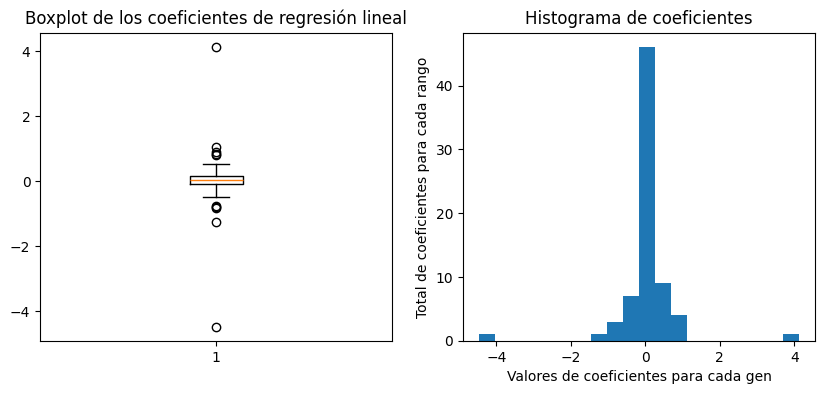

In [244]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(linear_model.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(linear_model.coef_,20)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

- El boxplot muestra outliers que podrian deberse a la alta colinealidad entre variables que encontramos antes. 
- La distribucion del histograma con un gran pico sobre el cero sugiere que hay variables que no aportan informacion predictiva.

SEGUNDO MODELO - LASSOCV - REGRESION LINEAL REGULARIZADA|
---------------------------------------------------------

In [279]:
# Entrenamos un modelo LassoCV - debemos encontrar un buen valor de alpha (determina la intensidad de la regularización) mediante validación cruzada
m_lasso = LassoCV(alphas=np.logspace(-10, 1, 1000), cv=50, n_jobs=-1).fit(X_train_sc, y_train)

In [280]:
best_alpha = m_lasso.alpha_
print(f'Mejor alpha encontrado: {best_alpha}')

Mejor alpha encontrado: 3.824569722466999e-05


In [281]:
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
y_train_lasso = m_lasso.predict(X_train_sc)
y_test_lasso = m_lasso.predict(X_test_sc)

In [282]:
print('Metricas Lasso')
display(get_metrics(y_test_lasso, y_test, y_train_lasso, y_train))
print('Metricas originales')
get_metrics(y_model1_test, y_test, y_model1_train, y_train)

Metricas Lasso


,R2,Median AE,MAPE
Train set,0.979510,0.155037,2.317668
Test set,0.980476,0.149630,2.246795
Diferencia,0.000967,-0.005407,-0.070873


Metricas originales


,R2,Median AE,MAPE
Train set,0.979709,0.156411,2.306259
Test set,0.980560,0.150302,2.239825
Diferencia,0.000851,-0.006110,-0.066434


El hecho de que el resultado en los datos de test sea mejor que en los de train no es un buen indicativo

In [283]:
# Mostramos el porcentaje de variables canceladas y el numero de variables usadas en el modelo final lasso
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 2.78%
El modelo utiliza 70 variables.


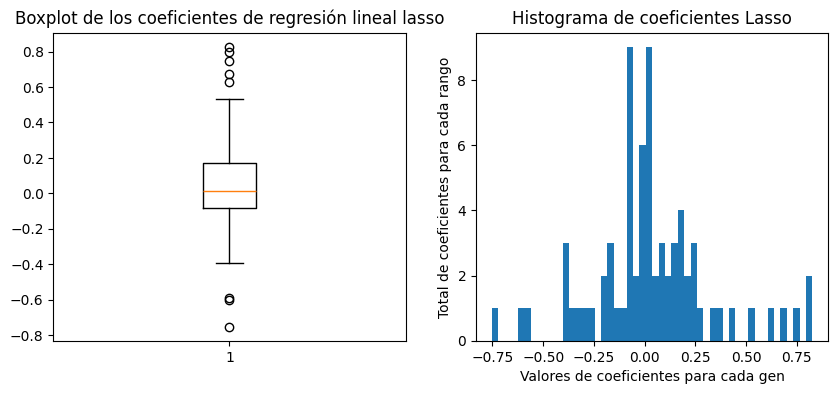

In [284]:
# Graficamos los coeficientes calculados para el modelo LassoCV
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal lasso')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,50)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes Lasso')
plt.show()

Se observa cierta mejora en las distribuciones. Se han eliminado un 2.78% de las variables , se han ajustado los valores atipicos en el boxplot y hay cierta normalidad en el histograma.

---------------------------------------------------------------------------------------------------------------

TERCER MODELO - RIDGECV - REGRESION LINEAL REGULARIZADA|
---------------------------------------------------------

In [285]:
# Entrenamos un modelo RidgeCV
m_ridge = RidgeCV(alphas=np.logspace(-10, 1, 50), cv=25).fit(X_train_sc, y_train)

In [286]:
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
y_train_ridge = m_ridge.predict(X_train_sc)
y_test_ridge = m_ridge.predict(X_test_sc)

In [287]:
print('Metricas Ridge')
display(get_metrics(y_test_ridge, y_test, y_train_ridge, y_train))
print('Metricas Lasso')
display(get_metrics(y_test_lasso, y_test, y_train_lasso, y_train))
print('Metricas originales')
get_metrics(y_model1_test, y_test, y_model1_train, y_train)

Metricas Ridge


,R2,Median AE,MAPE
Train set,0.979593,0.154476,2.310841
Test set,0.980371,0.152574,2.249290
Diferencia,0.000777,-0.001902,-0.061551


Metricas Lasso


,R2,Median AE,MAPE
Train set,0.979510,0.155037,2.317668
Test set,0.980476,0.149630,2.246795
Diferencia,0.000967,-0.005407,-0.070873


Metricas originales


,R2,Median AE,MAPE
Train set,0.979709,0.156411,2.306259
Test set,0.980560,0.150302,2.239825
Diferencia,0.000851,-0.006110,-0.066434


De nuevo, el modelo se comporta mejor en el test que en el train

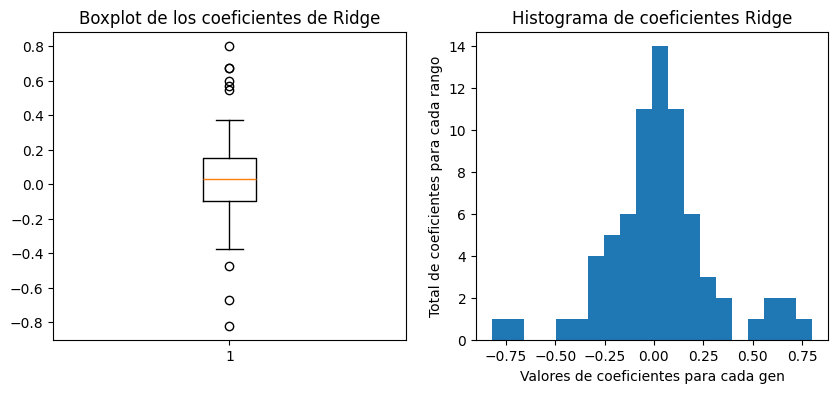

In [288]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de Ridge')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,20)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes Ridge')
plt.show()

------------------------------------------------------------------------------------------------------------



                                            FIN DE MODELOS
                                            --------------

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

GRAFICACION DE LA EVOLUCION DE R² vs ALPHA|
-------------------------------------------

In [270]:
# Definimos una funcion que nos permita graficar el efecto de la regularizacion en el R2
# Recibe los datos de entrenamiento y testeo, el modelo a utilizar y los valores de alpha
def regularization_graph( x_train_data, y_train_data,x_test_data, y_test_data, model, alphas=np.logspace(-6, 6, 500) ):
    # Definimos las listas donde guardaremos los valores de R2
    train_rsquared_list = []
    test_rsquared_list = []
    # Iteramos sobre los valores de alpha
    for alpha in alphas:
        # Establecemos un condicional para determinar el modelo a utilizar
        if model == 'Lasso':
            model_ = Lasso(alpha=alpha)
        elif model == 'Ridge':
            model_ = Ridge(alpha=alpha)
        # En caso de que el modelo no sea reconocido lanzamos un error
        else:
            raise ValueError("Modelo no reconocido. Use 'lasso' o 'ridge'.")
        # Ajustamos el modelo a los datos de entrenamiento y realizamos predicciones
        model_.fit(x_train_data, y_train_data)
        yhat_train = model_.predict(x_train_data)
        yhat_test = model_.predict(x_test_data)
        # Calculamos el R²
        r2_train = r2_score(y_train_data, yhat_train)
        r2_test = r2_score(y_test_data, yhat_test)
        # Guardamos los valores de R² en las listas
        train_rsquared_list.append(r2_train)
        test_rsquared_list.append(r2_test)
    # Graficamos los valores de R² almacenados en las listas
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, train_rsquared_list, label='Train $R^2$')
    plt.plot(alphas, test_rsquared_list, label='Test $R^2$')
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('$R^2$ Score')
    plt.title(f'(Efecto de la regularizacion en $R^2$ con {model}')
    plt.legend()
    plt.show()

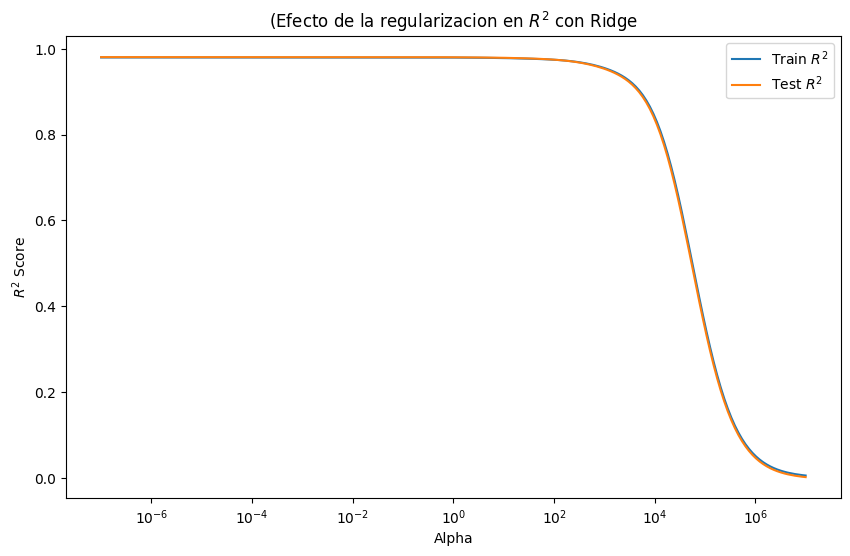

In [271]:
# Graficamos el efecto de la regularizacion en el R² para el modelo Lasso
regularization_graph( X_train_sc, y_train,X_test_sc, y_test, 'Ridge', alphas=np.logspace(-7,7, 200) )

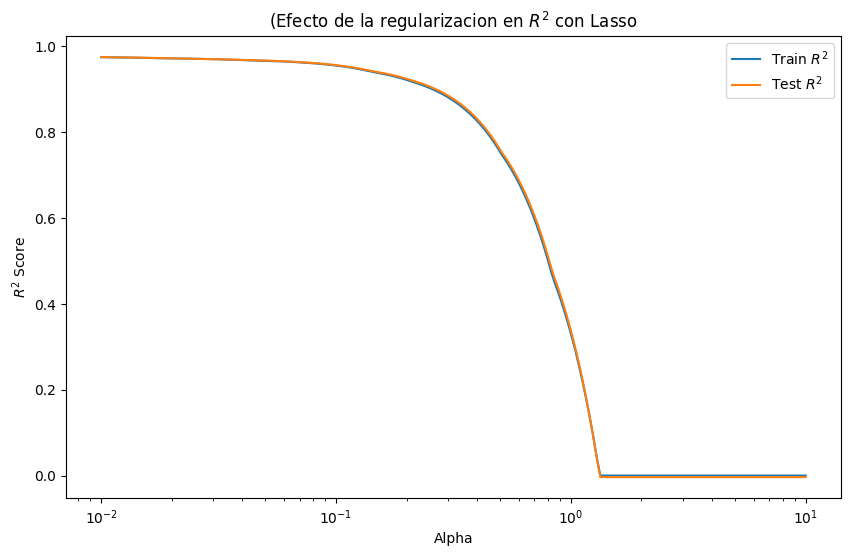

In [272]:
# Graficamos el efecto de la regularizacion en el R² para el modelo Ridge
regularization_graph( X_train_sc, y_train,X_test_sc, y_test, 'Lasso', alphas=np.logspace(-2, 1, 200) )

Se observa como en Ridge la aproximacion es progresiva y no llega a cero puesto que Ridge no anula coeficientes, solo disminuye su peso.

En Lasso, sin embargo, se produce una fuerte caida a medida que alpha crece hasta alcanzar el valor R² = 0

---------------------------------------------------------------------------------------------------------------

COMO PRUEBA CREO UN ULTIMO MODELO QUE AJUSTARE OBSERVANDO LA GRAFICA Y PROBANDO VALORES|
--------------------------------------------------------------------------------------------

In [262]:

# Entrenamos un modelo LassoCV debemos encontrar un buen valor de alpha (determina la intensidad de la regularización) mediante validación cruzada
m_lasso_a_ojo = Lasso(alpha=10**(-0.9)).fit(X_train_sc, y_train)

In [263]:
# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
y_train_lasso_a_ojo = m_lasso_a_ojo.predict(X_train_sc)
y_test_lasso2_a_ojo = m_lasso_a_ojo.predict(X_test_sc)

In [264]:
print('Metricas Lasso')
display(get_metrics(y_test_lasso2_a_ojo, y_test, y_train_lasso_a_ojo, y_train))
print('Metricas originales')
get_metrics(y_model1_test, y_test, y_model1_train, y_train)

Metricas Lasso


,R2,Median AE,MAPE
Train set,0.945903,0.269044,3.906436
Test set,0.947320,0.257322,3.831950
Diferencia,0.001418,-0.011723,-0.074486


Metricas originales


,R2,Median AE,MAPE
Train set,0.979709,0.156411,2.306259
Test set,0.980560,0.150302,2.239825
Diferencia,0.000851,-0.006110,-0.066434


In [265]:
# Mostramos el porcentaje de variables canceladas y el numero de variables usadas en el modelo final lasso
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso_a_ojo.coef_[np.abs(m_lasso_a_ojo.coef_)==0])/len(m_lasso_a_ojo.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso_a_ojo.coef_[np.abs(m_lasso_a_ojo.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 87.5%
El modelo utiliza 9 variables.


Es llamativo que se pueda conseguir un resultado similar al primer modelo con solo 9 variables|
--------------------------------------------------------------------------------------------------------

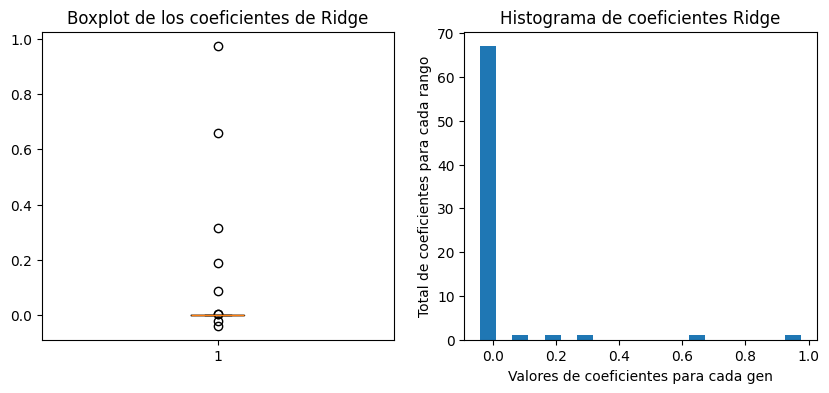

In [266]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso_a_ojo.coef_)
plt.title('Boxplot de los coeficientes de Ridge')
plt.subplot(1, 2, 2)
plt.hist(m_lasso_a_ojo.coef_,20)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes Ridge')
plt.show()

EXTRAER NOMBRES DE LAS VARIABLES SELECCIONADAS:
- En el curso de la optmizacion de un modelo y posterior analisis de sus resultados necesitaremos saber el nombre de las variables seleccionadas.

In [267]:
# Para extraer los nombres de las variables seleccionadas obtenemos los nombres de las columnas de x_train
variables = X_train.columns

# Crear una serie que asocie los nombres de las características con los coeficientes del modelo
coeficientes = pd.Series(m_lasso_a_ojo.coef_, index=variables)

# Filtrar las características con coeficientes diferentes de cero
variables_seleccionadas = coeficientes[coeficientes != 0]
# creamos una lista con el indice de ñla lista anterior en la que asociamos los coeficientes con las columnas
lista_variables_seleccionadas = variables_seleccionadas.index.tolist()
# Mostramos el numero de variables seleccionadas y las variables seleccionadas
print(f'Numero de variables seleccionadas por el modelo Lasso: {len(variables_seleccionadas.index.tolist())}')
print(f'Variables seleccionadas por el modelo Lasso: {lista_variables_seleccionadas}')


Numero de variables seleccionadas por el modelo Lasso: 9
Variables seleccionadas por el modelo Lasso: ['30-39 y/o % of total pop', 'Asian-alone pop', 'Percent of adults with a high school diploma only 2014-18', 'Percent of Population Aged 60+', 'Obesity_Upper 95% CI', 'COPD_Upper 95% CI', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'encoded_STATE_NAME']


                                    FINAL DE LA PRACTICA
                                    --------------------